<a href="https://colab.research.google.com/github/StevenSoeseno/Heart-Disease-Prediction/blob/main/RM_ML_HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

df = pd.read_csv("/content/kaggle_heart.csv")

In [ ]:
random_state = 42

# Preprocessing

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# df["target"].value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Air Termination System', ylabel='', labeldistance=None)
# ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

df["target"].value_counts()


# explode = [0.1] * len(df["target"].value_counts())

# plt.figure(figsize=(8, 8))
# plt.pie(df["target"].value_counts(), labels=df["target"].value_counts().index, autopct='%1.1f%%', startangle=140, explode=explode)  # Adjust the explode values as needed
# plt.title('Pie Plot of Target Column')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()


target
1    526
0    499
Name: count, dtype: int64

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = df.drop(columns=["target"])
y = df.target
# splitting 7:2:1 train:test:validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.125, shuffle=True, random_state=random_state)

# Modeling

In [ ]:
modelbeforetuning = SVC(random_state=random_state, kernel="rbf", C=1, gamma=1).fit(X_train, y_train)
prediction_beforeTuning = modelbeforetuning.predict(X_test)

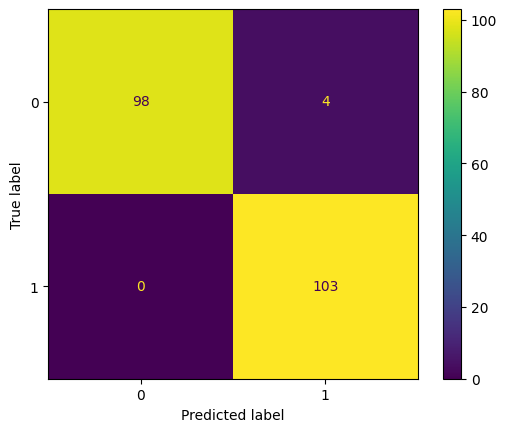

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, modelbeforetuning.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# print(modelbeforetuning.score(X_train, y_train))
# print(modelbeforetuning.score(X_val, y_val))
# print(modelbeforetuning.score(X_test, y_test))

print(classification_report(y_train, modelbeforetuning.predict(X_train)))
print(classification_report(y_test, prediction_beforeTuning))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       368

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.96      1.00      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [ ]:
model = SVC(random_state=random_state, C=0.1, kernel ="linear", gamma="auto").fit(X_train, y_train)
prediction = model.predict(X_test)

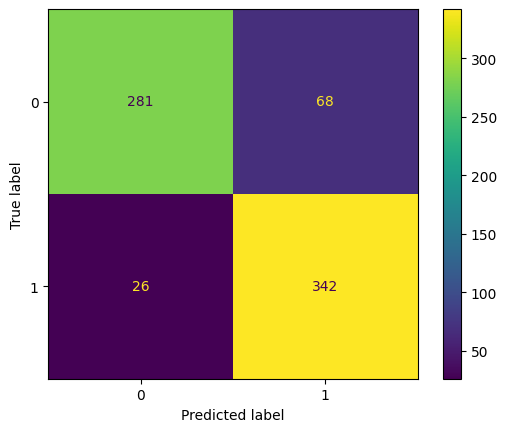

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, model.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# print(model.score(X_train, y_train))
# print(model.score(X_val, y_val))

print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       349
           1       0.83      0.93      0.88       368

    accuracy                           0.87       717
   macro avg       0.87      0.87      0.87       717
weighted avg       0.87      0.87      0.87       717

              precision    recall  f1-score   support

           0       0.91      0.69      0.78       102
           1       0.75      0.93      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



# Ensemble (Bagging)

In [ ]:
modelbeforetuning = BaggingClassifier(estimator=SVC(), n_estimators=2, random_state=random_state).fit(X_train, y_train)
prediction_beforeTuning = modelbeforetuning.predict(X_test)

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       349
           1       0.65      0.77      0.70       368

    accuracy                           0.67       717
   macro avg       0.67      0.67      0.66       717
weighted avg       0.67      0.67      0.66       717

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       102
           1       0.60      0.68      0.64       103

    accuracy                           0.61       205
   macro avg       0.62      0.61      0.61       205
weighted avg       0.62      0.61      0.61       205



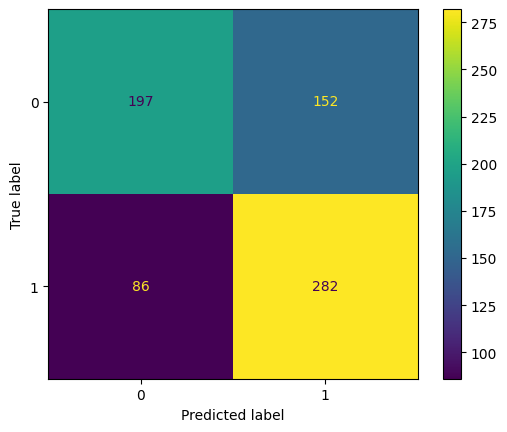

In [ ]:
# print(modelbeforetuning.score(X_train, y_train))
# print(modelbeforetuning.score(X_val, y_val))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, modelbeforetuning.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print(classification_report(y_train, modelbeforetuning.predict(X_train)))
print(classification_report(y_test, prediction_beforeTuning))

disp.plot()

In [ ]:
model = BaggingClassifier(estimator=SVC(kernel="linear", C=0.1, gamma="auto"), n_estimators=2, random_state=random_state).fit(X_train, y_train)
prediction = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       349
           1       0.84      0.91      0.87       368

    accuracy                           0.87       717
   macro avg       0.87      0.86      0.87       717
weighted avg       0.87      0.87      0.87       717

              precision    recall  f1-score   support

           0       0.86      0.69      0.77       102
           1       0.74      0.89      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



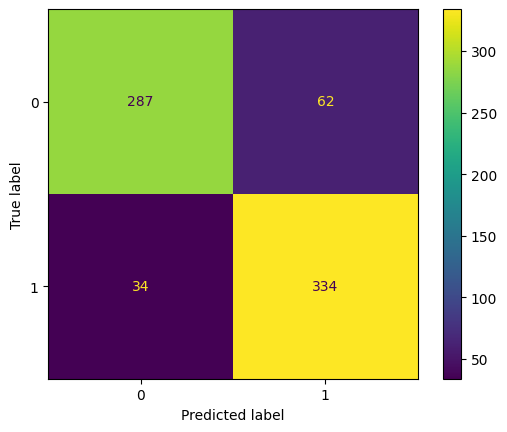

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, model.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, prediction))

disp.plot()

In [ ]:
# print(model.score(X_train, y_train))
# print(model.score(X_val, y_val))

print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       349
           1       0.84      0.91      0.87       368

    accuracy                           0.87       717
   macro avg       0.87      0.86      0.87       717
weighted avg       0.87      0.87      0.87       717

              precision    recall  f1-score   support

           0       0.86      0.69      0.77       102
           1       0.74      0.89      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



# Testing

In [ ]:
print(modelbeforetuning.score(X_test, y_test))

0.6146341463414634


In [ ]:
print(model.score(X_test, y_test))

0.7902439024390244


experiments

In [ ]:
# import pandas as pd
# import sklearn
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.svm import SVC
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import BaggingClassifier
# from sklearn.datasets import make_classification

# df = pd.read_csv("kaggle_heart.csv")

# random_state = 78
# max_accuracy = 0

# param_grid = {
#     'estimator__C': [0.1],
#     'estimator__gamma': [1],
#     'estimator__kernel': ['linear'],
#     'n_estimators': [10]
# }

# for i in range(90,300):
#     X = df.drop(columns=["target"])
#     y = df.target
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=i)
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.125, shuffle=True, random_state=i)
#     model = BaggingClassifier(estimator=SVC(), random_state=i)

#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     accuracy = best_model.score(X_test, y_test) <-------- here validation????


#     if accuracy > max_accuracy:
#             max_accuracy = accuracy
#             random_state = i
#             print(f"Accuracy: {accuracy}, Random State: {i}")
#             print(f"Best Parameters: {grid_search.best_params_}")

# print(f"Best Random State: {random_state} with Accuracy: {max_accuracy}")

# #Best Parameters: {'estimator__C': 0.1, 'estimator__gamma': 1, 'estimator__kernel': 'linear', 'n_estimators': 10}
# #Best Random State: 182 with Accuracy: 0.9024390243902439

In [ ]:
#finding right random state

In [ ]:
# import pandas as pd
# import sklearn
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.svm import SVC
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import BaggingClassifier
# from sklearn.datasets import make_classification

# df = pd.read_csv("/content/kaggle_heart.csv")

# random_state = 78
# max = 0

# for i in range(100):
#   X = df.drop(columns=["target"])
#   y = df.target
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=i)
#   X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.125, shuffle=True, random_state=i)
#   model = BaggingClassifier(base_estimator=SVC(kernel="linear"), n_estimators=2, random_state=i).fit(X_train, y_train)
#   if(model.score(X_test, y_test) > max):
#     max = model.score(X_test, y_test)
#     random_state = i
#     print(model.score(X_test, y_test))
#     print(i)

In [ ]:
# import pandas as pd
# import sklearn
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.svm import SVC
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import BaggingClassifier
# from sklearn.datasets import make_classification

# df = pd.read_csv("kaggle_heart.csv")

# random_state = 182
# max_accuracy = 0

# param_grid = {
#     'estimator__C': [0.01, 0.1, 1, 10],
#     'estimator__gamma': [0.001, 0.01, 0.1, 1],
#     'estimator__kernel': ['linear', 'rbf'],
#     'n_estimators': [2, 5, 10, 20, 50],
# }
# X = df.drop(columns=["target"])
# y = df.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=i)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.125, shuffle=True, random_state=i)
# model = BaggingClassifier(estimator=SVC(random_state=random_state), random_state=random_state)

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(X_test, y_test)


# if accuracy > max_accuracy:
#         max_accuracy = accuracy
#         random_state = i
#         print(f"Accuracy: {accuracy}, Random State: {i}")
#         print(f"Best Parameters: {grid_search.best_params_}")


# print(f"Best Random State: {random_state} with Accuracy: {max_accuracy}")



# #Best Parameters: {'estimator__C': 0.1, 'estimator__gamma': 1, 'estimator__kernel': 'linear', 'n_estimators': 10}
# #Best Random State: 182 with Accuracy: 0.9024390243902439

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.tree import DecisionTreeClassifier

# df = pd.read_csv("kaggle_heart.csv")

# random_state = 78
# max_accuracy = 0

# param_grid = {
#     'svm__C': [0.1],
#     'svm__gamma': [1],
#     'svm__kernel': ['linear'],
#     'rf__n_estimators': [10],
#     'knn__n_neighbors': [3],
#     'final_estimator__C': [0.1]
# }


# X = df.drop(columns=["target"])
# y = df.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=random_state)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=True, random_state=random_state)

# estimators = [
#     ('svm', SVC(probability=True, random_state=random_state, C= 0.1, gamma = 1, kernel = 'linear')),
#     ('rf', RandomForestClassifier(n_estimators=10, random_state=random_state)),
#     ('dt', DecisionTreeClassifier(random_state=random_state)),
#     ('knn', KNeighborsClassifier(n_neighbors= 3))
# ]

# model = StackingClassifier(
#      estimators=estimators,
#      final_estimator=LogisticRegression()
# )

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(X_test, y_test)
# y_predict = best_model.predict(X_test)

# print(f"Accuracy: {accuracy}, Random State: {random_state}")
# print(f"Best Parameters: {grid_search.best_params_}")

# print(f"Best Random State: {random_state} with Accuracy: {accuracy}")
# print(classification_report(y_test, y_predict))

In [ ]:
# df = pd.read_csv("kaggle_heart.csv")

# param_grid = {
#     'svm__C': [0.1, 1, 10],
#     'svm__gamma': [1, 0.1, 0.01],
#     'svm__kernel': ['linear'],
#     'rf__n_estimators': [10, 20],
#     'knn__n_neighbors': [3, 5, 7],
#     'final_estimator__C': [0.1, 1, 10]
# }

# X = df.drop(columns=["target"])
# y = df.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=True, random_state=42)


# estimators = [
#     ('svm', SVC(probability=True, random_state=42)),
#     ('rf', RandomForestClassifier(random_state=42)),
#     ('knn', KNeighborsClassifier())
# ]

# model = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression()
# )

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(X_test, y_test)
# y_predict = best_model.predict(X_test)

# print(f"Accuracy: {accuracy}")
# print(f"Best Parameters: {grid_search.best_params_}")
# print(classification_report(y_test, y_predict))